In [65]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
zip_path = tf.keras.utils.get_file(
 origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

In [43]:
df = pd.read_csv(csv_path)
df = df[5::6] # make hourly
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [45]:
wv = df['wv (m/s)']
wv_bad = wv == -9999.00
wv[wv_bad] = 0.0

max_wv = df['max. wv (m/s)']
max_wv_bad = max_wv == -9999.00
max_wv[max_wv_bad] = 0.0

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


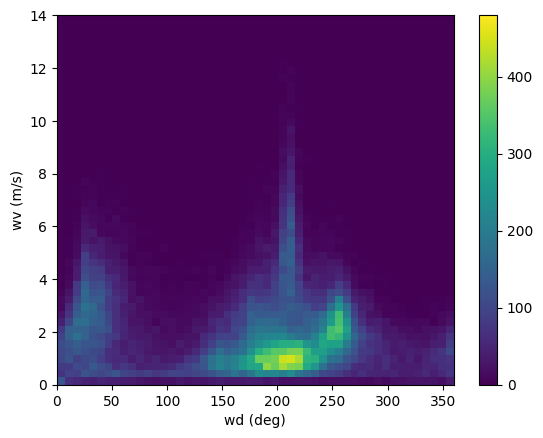

In [46]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('wd (deg)')
plt.ylabel('wv (m/s)')
plt.show()

In [47]:
wv = df.pop('wv (m/s)')
wv_max = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi/180.0

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = wv*np.cos(wd_rad)
df['max Wy'] = wv*np.sin(wd_rad)

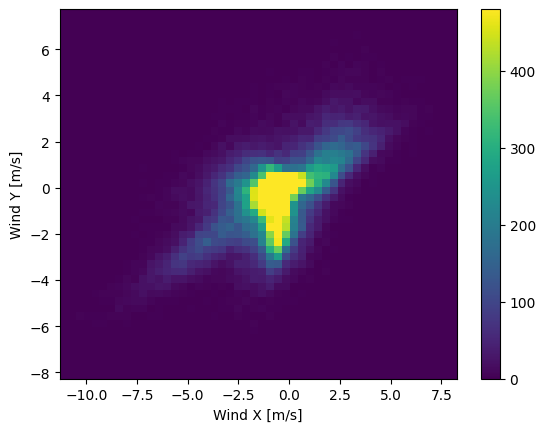

In [49]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [50]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [57]:
column_indices = {colname:i for i, colname in enumerate(df.columns)}

n = len(df)
train_df = df[:int(n*0.7)] # 70% train
val_df = df[int(n*0.7):int(n*0.9)] # 20% val
test_df = df[int(n*0.9):] # 10% test

num_features = df.shape[1]

print(f'train: {train_df.shape}\tval: {val_df.shape}\ttest: {test_df.shape}')

train: (49063, 19)	val: (14018, 19)	test: (7010, 19)


In [63]:
# normalizing with training set mean and standard deviation. !! this is not 100% clean -> since it's a time series, taking the mean over 
# the entire training dataset brings information from the future (end of the time series) into the past (start of the time series). however,
# because we've already taken away val and test datasets, this is not 'entirely dishonest' ;) 
train_mean = train_df.mean(axis=0)
train_sd = train_df.std(axis=0)

train_df = (train_df - train_mean) / train_sd
val_df = (val_df - train_mean) / train_sd
test_df = (test_df - train_mean) / train_sd

C:\Users\RobertoTatisMuvdi\AppData\Local\Temp\ipykernel_17488\821995871.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


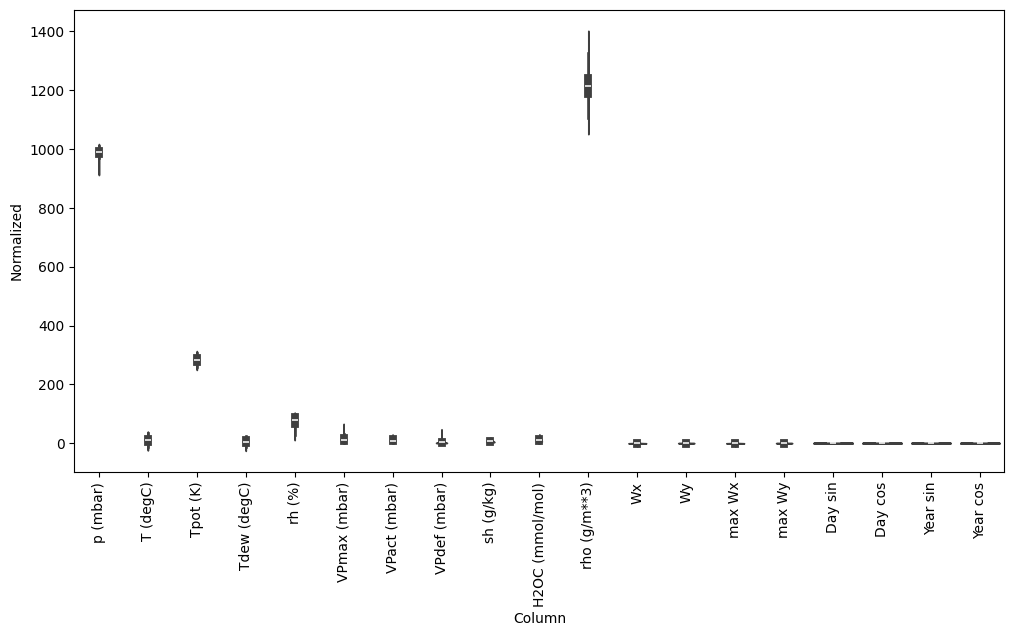

In [67]:
df_melted = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_melted)
_ = ax.set_xticklabels(df.keys(), rotation=90)

C:\Users\RobertoTatisMuvdi\AppData\Local\Temp\ipykernel_17488\533483995.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


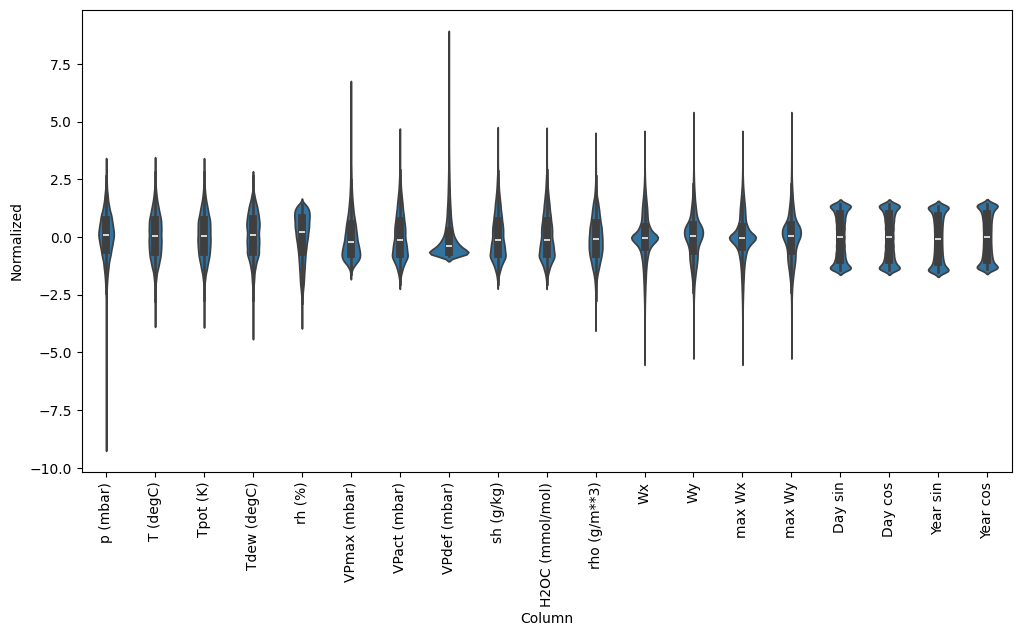

In [66]:
df_normalized = (df - train_mean) / train_sd
df_normalized = df_normalized.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_normalized)
_ = ax.set_xticklabels(df.keys(), rotation=90)